# 投资组合数据分析 
#### 关键词：投资组合优化，马科维茨有效前沿，蒙特卡洛模拟，夏普比率

Disclamer: 本项目来自数据/商业分析求职实战集训营名企项目实战，改编自Morgan Stanley面试项目，侵删。

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use("seaborn-white")
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import yfinance as yfin
yfin.pdr_override()

In [30]:
symbols = ['AAPL','BA','C','SBUX','IBM']
start = datetime(2018, 1, 1)
end = datetime(2020, 12, 31)
ts1 = pdr.get_data_yahoo(symbols,start,end)

[*********************100%***********************]  5 of 5 completed


today we will look at several famous single stock in US stock market:
- Apple Inc (AAPL)
- The Boeing Company (BA)
- Citigroup Inc (C)
- Starbucks Corporation (SBUX)
- International Business Machines Corporations (IBM)

In [31]:
ts1.head()

Adj Close                                                \
                 AAPL          BA          C         IBM       SBUX   
Date                                                                  
2018-01-02  40.888065  282.886444  62.809456  114.628723  51.791485   
2018-01-03  40.880943  283.801300  63.003719  117.779633  52.762077   
2018-01-04  41.070839  282.724365  63.780815  120.165070  52.959782   
2018-01-05  41.538441  294.322357  63.696354  120.752136  53.570889   
2018-01-08  41.384163  295.570740  62.953053  121.480408  53.301285   

                Close                                                ...  \
                 AAPL          BA          C         IBM       SBUX  ...   
Date                                                                 ...   
2018-01-02  43.064999  296.839996  74.360001  147.466537  57.630001  ...   
2018-01-03  43.057499  297.799988  74.589996  151.520081  58.709999  ...   
2018-01-04  43.257500  296.670013  75.510002  154.588913  58.930000  ...   
2018-01-05  43.750000  308.839996  75.410004  155.344162  59.610001  ...   
2018-01-08  43.587502  310.149994  74.529999  156.281067  59.310001  ...   

                 Open                                                \
                 AAPL          BA          C         IBM       SBUX   
Date                                                                  
2018-01-02  42.540001  295.750000  75.089996  147.705551  57.950001   
2018-01-03  43.132500  295.940002  74.349998  150.420654  57.930000   
2018-01-04  43.134998  297.940002  75.010002  152.629059  58.990002   
2018-01-05  43.360001  296.769989  75.709999  155.296371  59.250000   
2018-01-08  43.587502  308.660004  75.169998  155.506699  59.480000   

               Volume                                       
                 AAPL       BA         C      IBM     SBUX  
Date                                                        
2018-01-02  102223600  2978900  15819800  4395815  7216000  
2018-01-03  118071600  3211200  14657900  9875914  7478400  
2018-01-04   89738400  4171700  16864900  7903785  5775900  
2018-01-05   94640000  6177700  15300500  5434807  6047700  
2018-01-08   82271200  4124900  14215700  5478425  6335800  

[5 rows x 30 columns]

For simplicity, here we only consider adjusted close as daily price

In [34]:
ts = ts1['Adj Close'] # time series
ts

,AAPL,BA,C,IBM,SBUX
Date,,,,,
2018-01-02,40.888065,282.886444,62.809456,114.628723,51.791485
2018-01-03,40.880943,283.801300,63.003719,117.779633,52.762077
2018-01-04,41.070839,282.724365,63.780815,120.165070,52.959782
2018-01-05,41.538441,294.322357,63.696354,120.752136,53.570889
2018-01-08,41.384163,295.570740,62.953053,121.480408,53.301285
...,...,...,...,...,...
2020-12-23,129.209274,219.690002,56.145950,106.144409,97.580605
2020-12-24,130.205780,217.149994,55.951969,106.821190,97.532791
2020-12-28,134.862686,216.089996,56.469265,106.932571,99.760529


- Since we have loaded time series, let's have a look at the historical performance.
- In order for fair comparison, we normalize the starting point in the same

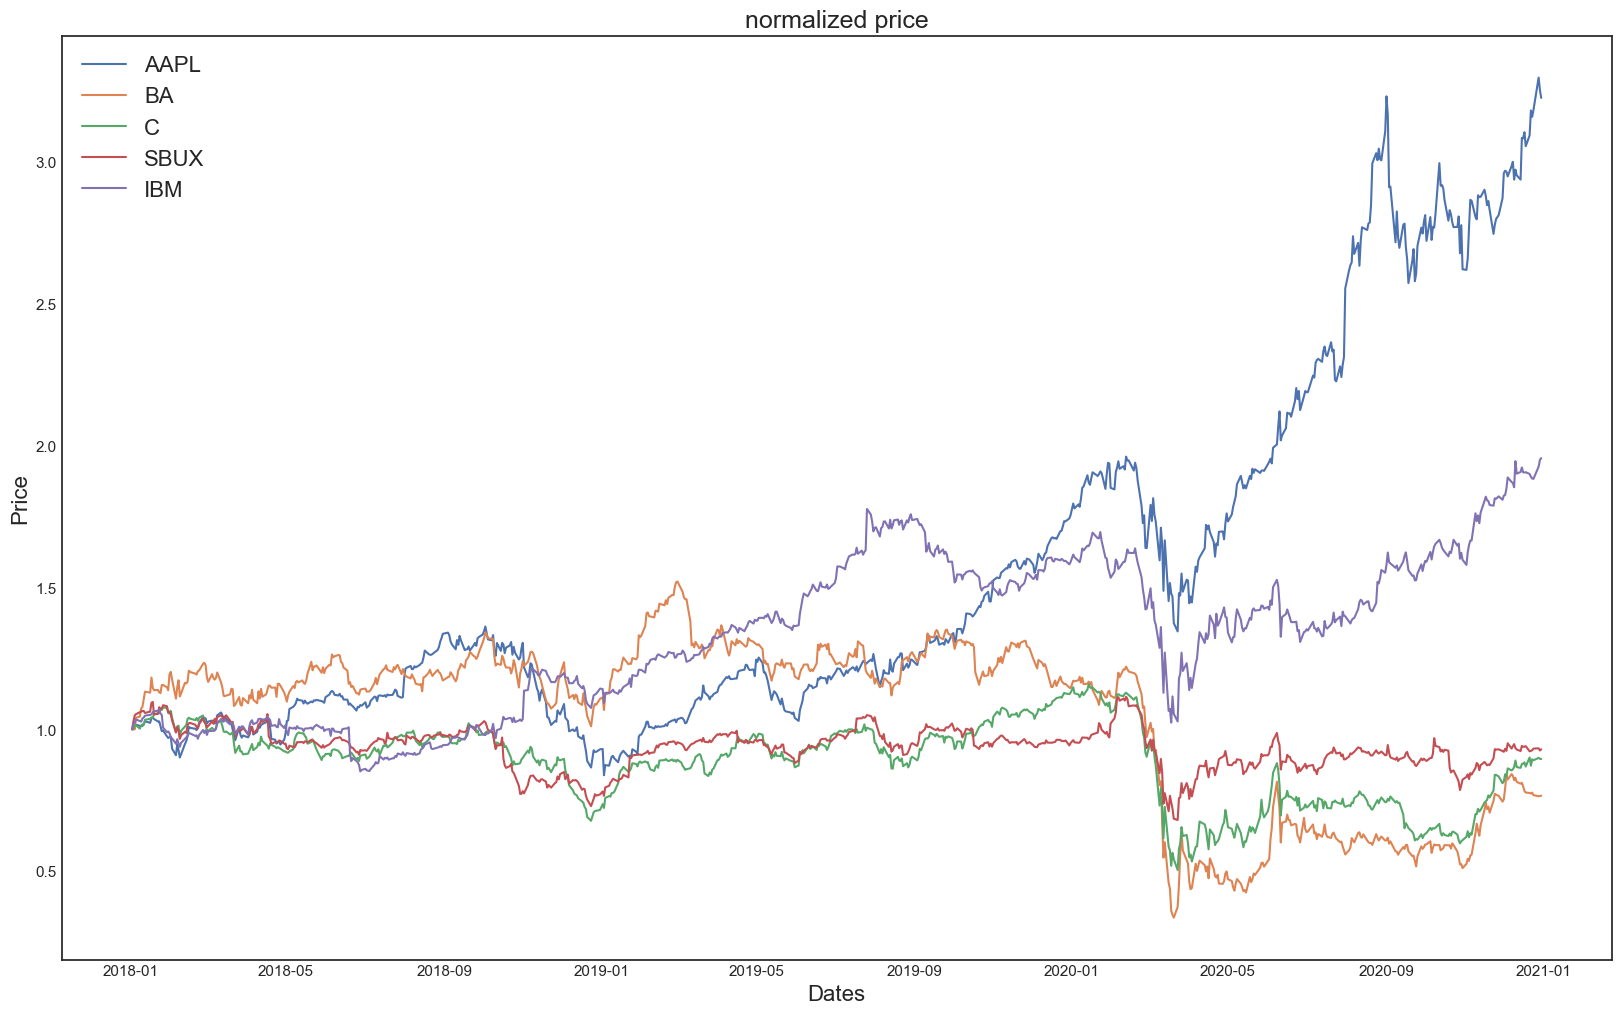

In [110]:
normalized_price = (ts/ts.iloc[0])
fig = plt.figure(figsize=(20,12))
plt.plot(normalized_price)
title_text_obj = plt.title("normalized price", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Price', fontsize = 16)
plt.legend(symbols, fontsize = 16, loc = "best")


# Return
- price change is what matters most in our industry, we need to calculate the daily price change based on pandas methods

In [111]:
AAPL_return = ts['AAPL'].pct_change() # percentage change
AAPL_return.head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: AAPL, dtype: float64

In [42]:
BA_return = ts['BA'].pct_change()
C_return = ts['C'].pct_change()
SBUX_return = ts['SBUX'].pct_change()
IBM_return = ts['IBM'].pct_change()

returns = ts.pct_change()

In [112]:
returns

,AAPL,BA,C,IBM,SBUX
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.003234,0.003093,0.027488,0.018740
2018-01-04,0.004645,-0.003795,0.012334,0.020253,0.003747
2018-01-05,0.011385,0.041022,-0.001324,0.004886,0.011539
2018-01-08,-0.003714,0.004242,-0.011669,0.006031,-0.005033
...,...,...,...,...,...
2020-12-23,-0.006976,0.004159,0.025650,0.002346,-0.003418
2020-12-24,0.007712,-0.011562,-0.003455,0.006376,-0.000490
2020-12-28,0.035766,-0.004881,0.009245,0.001043,0.022841


- Now we have $N$ stocks, and the $i$-th stock has return $R_i$, with expectation $r_i$. 
- We can define $R = (R_1, R_2, ..., R_N)^{T}$
- Then we have $E(R)= (r_1, r_2, ..., r_N)^{T}$

x ~ ln(1+x)

In [44]:
returns.mean()

AAPL    0.001800
BA      0.000275
C       0.000234
IBM     0.000083
SBUX    0.001088
dtype: float64

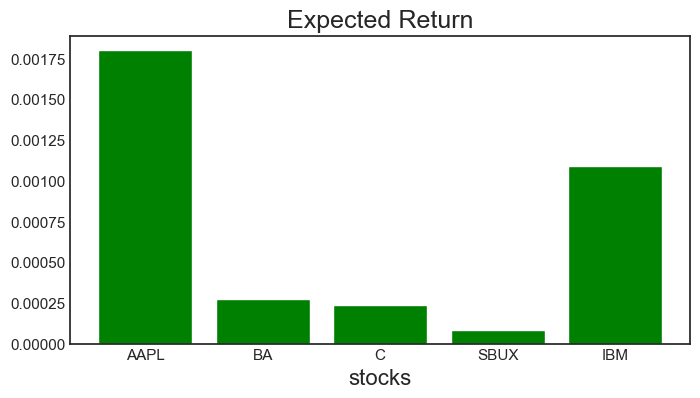

In [140]:
fig = plt.figure(figsize=(8,4))
plt.bar(symbols, returns.mean().values, color='green')
title_text_obj = plt.title("Expected Return", fontsize = 18)
xlabel_obj = plt.xlabel('stocks', fontsize = 16)
plt.show()

# Volatility
- here we use standard deviation to measure volatility
- for daily volatility, we can use formula below to calculate ${\sf std} = \sqrt{\sum^{N}_{i=1}{(x_i-\bar{x})^2/(N-1)}}$
- To convert daily volatility to annualized volatility, we need to multiply the standard deviation by square root of 252 (usually we assume market is open for 252 days per year) ${\sf annualized\ std} = {\sf std} * \sqrt{252}$
- for example, we calculate the annualized volatility for Apple

In [48]:
ONEYEARDAYS = 252
AAPL_std = AAPL_return.std() * np.sqrt(ONEYEARDAYS)
AAPL_std

0.35121444735045637

- we do the same thing for the remaining stocks

In [ ]:
BA_std = BA_return.std() * np.sqrt(ONEYEARDAYS)
C_std = C_return.std() * np.sqrt(ONEYEARDAYS)
SBUX_std = SBUX_return.std() * np.sqrt(ONEYEARDAYS)
IBM_std = IBM_return.std() * np.sqrt(ONEYEARDAYS)

In [50]:
stock_std = ts.pct_change().std().apply(lambda x: x*np.sqrt(252))
stock_std

AAPL    0.351214
BA      0.562543
C       0.437111
IBM     0.300307
SBUX    0.316021
dtype: float64

- we can visualize how their volatilities look likle

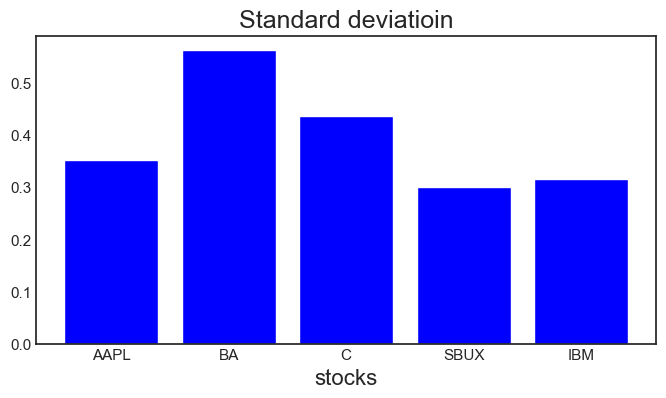

In [141]:
fig = plt.figure(figsize = (8,4))
plt.bar(symbols, stock_std.values, color = 'blue')
title_text_obj = plt.title("Standard deviatioin", fontsize = 18)
xlabel_obj = plt.xlabel("stocks", fontsize = 16)
plt.show()

- other risk measures for return distribution: skewness and kurtosis
- if $X$ ~ standard normal distribution, then $E[kurtosis] = 3$; $E[skewness] = 0$
$${\sf Skewness} = E[(\frac{X-\mu}{\sigma(X)})^3]$$ 
$${\sf Kurtosis} = E[(\frac{X-\mu}{\sigma(X)})^4]$$

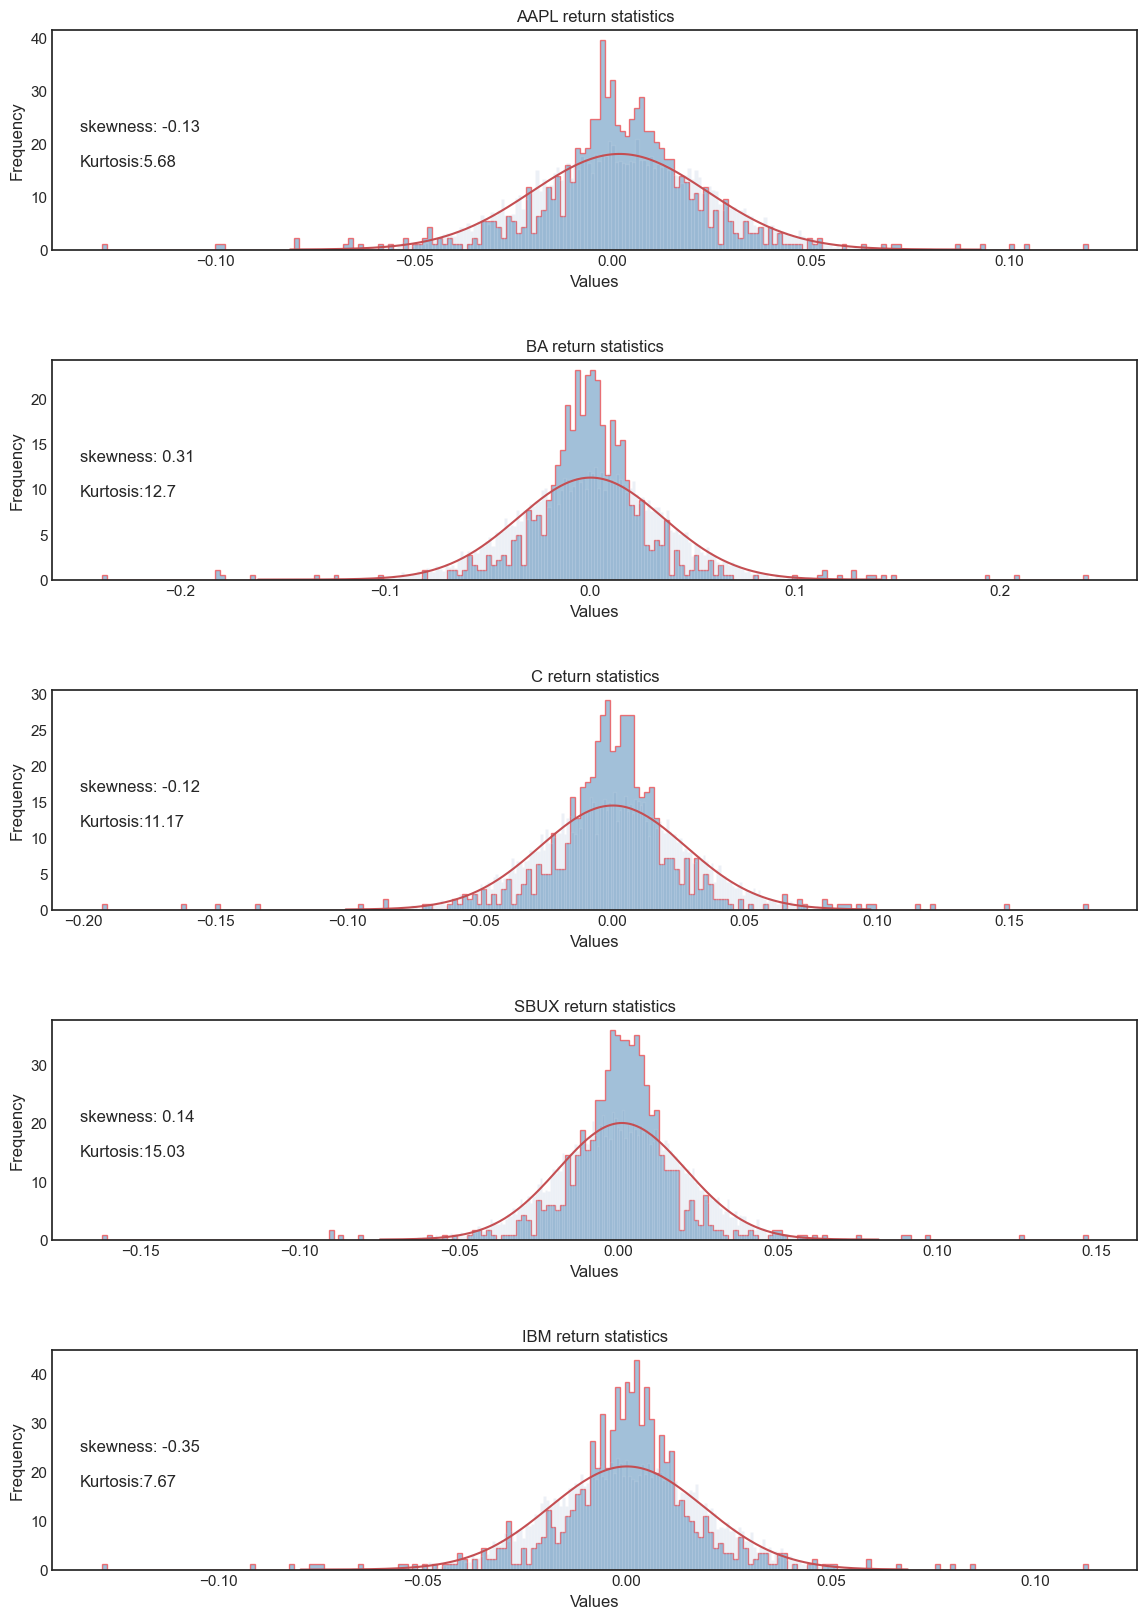

In [116]:
binsnumber = 200
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (14,20))
plt.subplots_adjust(hspace=0.5, wspace=4) # add spaces in between plots

def return_statistics(tickname):
    ax = plt.gca()
    ax.hist(returns[tickname], bins=binsnumber, color='steelblue', density = True, 
            alpha=0.5, histtype='stepfilled', edgecolor='red')

    sigma, mu = returns[tickname].std(), returns[tickname].mean()
    s = np.random.normal(mu, sigma, 10000)
    count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha=0.1)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2* sigma**2)), linewidth=1.5, color='r')

    ax.annotate('skewness: {}\n\nKurtosis:{}'.format(
                round(returns[tickname].skew(),2),
                round(returns[tickname].kurtosis(),2)),
                xy=(10,20), xycoords='axes points', xytext=(20,60), fontsize=12)

    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title('{} return statistics'.format(tickname))
    
#=========================================

plt.subplot(511)
return_statistics('AAPL')

plt.subplot(512)
return_statistics('BA')

plt.subplot(513)
return_statistics('C')

plt.subplot(514)
return_statistics('SBUX')

plt.subplot(515)
return_statistics('IBM')



# Sharp Ratio

- $\frac{R_p - R_f}{\sigma_p}$
- $R_p$ is the return of the portfolio
- $R_f$ is the risk-free rate, here we take it as 0
- $\sigma_p$ is the standard deviation of the portfolio

In [77]:
stats = pd.DataFrame()
stats['Annualized Return(%)'] = np.round(returns.mean() * ONEYEARDAYS * 100, 2)
stats['Annualized Volatility(%)'] = np.round(returns.std() * np.sqrt(ONEYEARDAYS) * 100, 2)
stats['Sharp Ratio(%)'] = np.round(stats['Annualized Return(%)'] / stats['Annualized Volatility(%)'], 2)
stats.style.bar(color=['red','green'], align='zero')

,Annualized Return(%),Annualized Volatility(%),Sharp Ratio(%)
AAPL,45.360000,35.120000,1.290000
BA,6.920000,56.250000,0.120000
C,5.910000,43.710000,0.140000
IBM,2.080000,30.030000,0.070000
SBUX,27.430000,31.600000,0.870000


# Covariance, correlation, covariance matrix
- if we consider multiple stocks, we also need to consider the covariance between each stock $\Omega = Cov(R)$
- let $\Omega_{ij}$ be the covariance of $R_i$ and $R_j$, $\Omega_{ij} = Cov(R_i, R_j)$, $\sigma_i = \sqrt{\Omega_{ii}}$ is the standard deviation (std) of $R_i$

In [78]:
AAPL_return.cov(BA_return)

0.00034463569890828746

In [79]:
AAPL_return.cov(AAPL_return)

0.0004894904286812953

In [125]:
AAPL_return.var()

In [124]:
AAPL_return.corr(BA_return) # rho12

In [82]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,BA,C,IBM,SBUX
AAPL,0.000489,0.000345,0.000318,0.000224,0.000237
BA,0.000345,0.001256,0.000657,0.000369,0.000394
C,0.000318,0.000657,0.000758,0.000340,0.000366
IBM,0.000224,0.000369,0.000340,0.000358,0.000217
SBUX,0.000237,0.000394,0.000366,0.000217,0.000396


# Weights and stocks combination
### let's start from 2 stocks:
- suppose two stocks have expected $\sf daily return$ as $r_1$ and $r_2$ 
- we allocate different weights to them as $w_1$ and $w_2$ where $w_1 + w_2 = 1$
- the combination can have expected return 
$$E[r_c] =  w_1r_1 + w_2r_2$$
- in order to calculate the combination's volatility (variance & standard deviation), we need to take their correlation $\rho_{12}$ and volatility $\sigma_1$ and $\sigma_2$ into consideration.
$$\sigma_{r_c} = w^2_1\sigma^2_1 + w^2_2\sigma^2_2 + 2w_1 w_2 \rho_{12} \sigma_1 \sigma_2$$

### Take AAPL and BA as an example


In [121]:
annualized_returns = returns.mean()
annualized_returns

AAPL    0.001800
BA      0.000275
C       0.000234
IBM     0.000083
SBUX    0.001088
dtype: float64

In [122]:
annualized_vols = ts.pct_change().std() # first line = sig1
annualized_vols

AAPL    0.022124
BA      0.035437
C       0.027535
IBM     0.018918
SBUX    0.019907
dtype: float64

Now we have combination of (1) AAPL and (2) BA: 

In [128]:
r1 = annualized_returns['AAPL']
r1

In [129]:
r2 = annualized_returns['BA']
r2

In [130]:
sig1 = annualized_vols['AAPL'] 
sig1

In [131]:
sig2 = annualized_vols['BA']
sig2

In [132]:
rho12 = AAPL_return.corr(BA_return)
rho12

- remember we have constraint as $w_1+w_2=1$ => $w_2 = 1-w$; ($w=w_1$)
- accordingly, $\sigma^2_{r_c} = w^2\sigma^2_1 + (1-w)^2\sigma^2_2 + 2w(1-w)\rho_{12}\sigma_1\sigma_2$

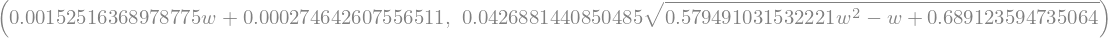

In [133]:
import sympy as sy
from sympy.interactive import printing

printing.init_printing(use_latex=True)
## w for w_1, where w_2 = 1 - w_1 = 1 - w
w = sy.symbols('w', positive=True, real=True)

## expected return of 2 stocks combination:
r_c = w * r1 + (1-w) * r2
variance_c = sy.simplify(sig1**2 * w**2 + sig2**2 * (1-w)**2 + 2*w*(1-w)*rho12*sig1*sig2)
std_c = sy.sqrt(variance_c)
sy.simplify(r_c), sy.simplify(std_c)

In [134]:
def get_two_stocks_std(w):
    return np.sqrt(sig1**2 * w**2 + sig2**2 * (1-w)**2 + 2*w*(1-w)*rho12*sig1*sig2)

def get_two_stocks_return(w):
    return w*r1 + (1-w)*r2

Text(0.5, 0, 'Std')

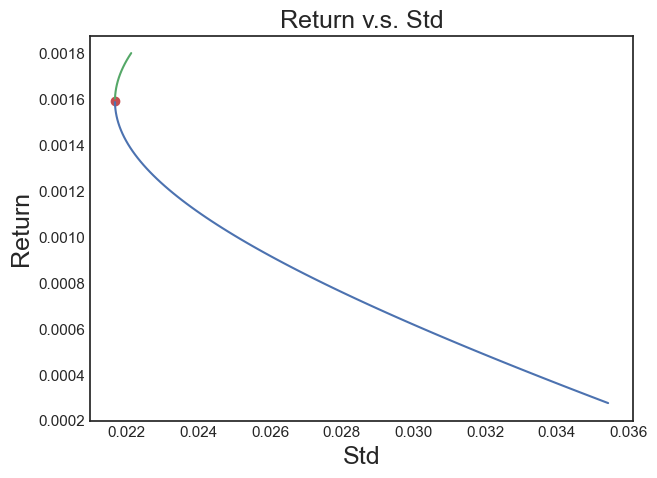

In [143]:
fig = plt.figure(figsize = (7,5))
ws = np.linspace(0,1,101)
std_series = get_two_stocks_std(ws)
return_series = get_two_stocks_return(ws)

w_min = (sig2**2 - sig1*sig2*rho12) / (sig1**2 + sig2**2 - 2*sig1*sig2*rho12)

plt.plot(get_two_stocks_std(w_min), get_two_stocks_return(w_min), 'ro')

plt.plot(get_two_stocks_std(ws[ws < w_min]), get_two_stocks_return(ws[ws < w_min]), 'b-')
plt.plot(get_two_stocks_std(ws[ws > w_min]), get_two_stocks_return(ws[ws > w_min]), 'g-')

plt.title('Return v.s. Std', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xlabel('Std', fontsize = 18)

- Here we can see the relationship between return and standard deviation when we combine 2 stocks together. Such combinations is also called portfolio.
- Portfolio can be variant based on the weights we allocate to different stocks. And we can find that there exists one point wwhen the std of the portfolio is at it minimum
- The green part of the line is called "efficient frontier"

### Portfolio of multiple stocks
- Let $w_i$ be the weight on $R_i$ in portfolio
$$w=(w_1,w_2,...,w_N)^T$$
- Weights have constraint $w_1 + w_2 +...+ w_N={\bf1}^T w = 1$
- Portfolio with weights $w$ has expected return:
$$\Sigma^{N}_{i=1}w_i r_i = w^T E[R]$$
- Portfolio with weights $w$ has variance:
$${\sf variance}_p = \Sigma^{N}_{i=1} \Sigma^{N}_{j=1} w_i w_j \Omega_{i,j} = w^T \Omega w$$

- Based on such conclusions, how can we find a way to find the minimum variance of the portfolio?
There exists theoretical methods. But here we apply a more practical way called Monte Carlo Simulation

In [136]:
portfolio_returns = []
portfolio_vols = []

for p in range(50000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(returns[symbols].mean() * weights))
    portfolio_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns[symbols].cov(),weights))))
    
portfolio_returns = np.array(portfolio_returns)

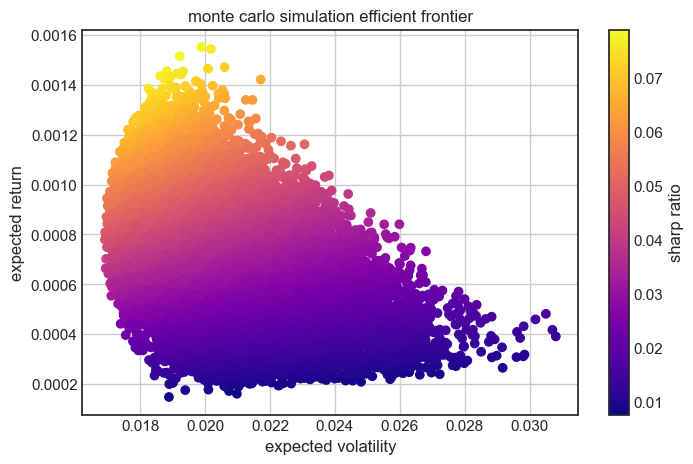

In [145]:
fig = plt.figure(figsize = (8,5))

plt.scatter(portfolio_vols, portfolio_returns, c = portfolio_returns/portfolio_vols, marker='o',cmap='plasma')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'sharp ratio')
plt.title('monte carlo simulation efficient frontier')
plt.show()
